In [1]:
import pandas as pd
import openpyxl
import datetime
import matplotlib.pyplot as plt

In [2]:
data_to_extract = pd.read_excel('Suivi_PRI.xlsx', sheet_name="Donnees_Sorties")

In [3]:
data_to_extract

,Bdsid,Master Id,Client,Site,Famille,Offre Consolidee,Offre,Declinaison Offre,Produit,Techno Acces,...,Abo Keuros Dim,Fas Keuros Dim,PRI_keuros,Date Mef,AnneeSemaine_Mef,Date Affectationcdp,Contrat Cadre,Spécificité,ID_commande_price,Type_Acte_PB
0,9395248,0000000009455171,DIRECTION Sces ADMINISTRATIFS FINANCIERS,CD-CHATEAUDUN,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.3215,0.0,0.3215,2021-03-31,202113,2018-06-15,37358.0,NaN,NaN,NaN
1,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,MA-BORGO,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7365,0.0,0.7365,2021-03-30,202113,2018-06-27,37358.0,NaN,NaN,NaN
2,9427794,0000000009467458,EIFFAGE SYSTEMES D'INFORMATION,EIFFAGE SI/ENROBES DE LA CRAU ISTRES,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.0760,0.0,0.0760,2021-03-10,202110,2018-06-27,39607.0,NaN,NaN,NaN
3,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,TGI-VALENCE,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7920,0.0,0.7920,2021-03-30,202113,2018-07-03,37358.0,NaN,NaN,NaN
4,9937745,0000000009720098,COLRUYT RETAIL France,CODIFRANCE FAULQUEMONT,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.1300,0.0,0.1300,2021-03-08,202110,2019-01-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,12513838,AVSBO0000000005878,ALTIVERALU,ALTIVERALU ST PATERNE RACAN(0000003850240),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès OTT,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37747.0,NaN,2100360232-001,RESIL
6173,12513958,0000000004650011,COM DE COMMUNES DES PORTES DU LUXEMBOURG,C.C.P.L. CARIGNAN(0000002413451),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,36424.0,NaN,2100360478-001,RESIL
6174,12514793,0000000006481117,TRANSPORT 2000,TRANSPORT 2000 GARGES LES GONESSE(0000003125780),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès ADSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37277.0,NaN,2100362126_EXEC-001,COPTL
6175,12514998,0000000010292193,COOP FRUITS LEGUMES PYRENEES ORIENTALES,COOP FRUITS LEGUMES PYRENEES O(0000003698054),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37281.0,NaN,2100362512-001,RESIL


In [4]:
""" Ask the file to use and load """
name_file = "Suivi_PRI.xlsx"#input('Entrez le nom du fichier a analyser : ')+".xlsx"
name_sheet = "Donnees_Sorties" #input("Entrez le nom de la feuille a analyser : ")
name_keyword_for_extract = "9 IP NET"#input("Le nom de la colonne en fonction duquel se fera le doublons :  ")
name_new_file_extract = "New_"+name_file#input("Nom du nouveau fichier créé : ")+"xlsx"
name_col = "Offre"
name_id_to_sort = "Bdsid"
dest_filename = name_file
data_to_extract = pd.read_excel(dest_filename, sheet_name=name_sheet) # read file to give 
new_data = data_to_extract[data_to_extract[name_col]==name_keyword_for_extract].sort_values(by=[name_id_to_sort]) # make 
# extraction from dest_filename for having only data link to nele_keywork_for_extract
data_to_treat = new_data[["Bdsid","Master Id","Client","Site","Offre", "Declinaison Offre", "Cdp","Manager Cdp", 
                          "Equipe Cdp", "Date Signature", "Date Debut Dplt", "Date Affectationcdp", 
                          "Date Cr Lien BDSID", "Date Installation Client", "Date Mise En Service", 
                          "Date Mef","Date Engagement", "Délai Déploiement (Jour ouvré) Dim", 
                          "Date_Min_Lien_BDSID"]] # only column that I want
data_to_treat.to_excel(name_new_file_extract, sheet_name=name_sheet, index = False) # create new 
data_to_treat
# file contains data in new_data
#print("fini")

,Bdsid,Master Id,Client,Site,Offre,Declinaison Offre,Cdp,Manager Cdp,Equipe Cdp,Date Signature,Date Debut Dplt,Date Affectationcdp,Date Cr Lien BDSID,Date Installation Client,Date Mise En Service,Date Mef,Date Engagement,Délai Déploiement (Jour ouvré) Dim,Date_Min_Lien_BDSID
0,9395248,0000000009455171,DIRECTION Sces ADMINISTRATIFS FINANCIERS,CD-CHATEAUDUN,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-04-03,2018-06-15,2018-06-15,2021-03-30,2021-03-31,2021-03-31,2021-03-31,2019-03-01,705,2018-07-31
1,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,MA-BORGO,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-06-01,2018-06-27,2018-06-27,2020-09-11,2021-03-25,2021-03-25,2021-03-30,2019-04-01,696,2019-02-13
2,9427794,0000000009467458,EIFFAGE SYSTEMES D'INFORMATION,EIFFAGE SI/ENROBES DE LA CRAU ISTRES,9 IP NET,9iPnet,cleflochlasbley,swojciechowski,GC Finances & Services,2018-04-20,2018-06-27,2018-06-27,2020-01-07,2021-03-10,2021-03-10,2021-03-10,2018-11-15,682,2018-07-18
3,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,TGI-VALENCE,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-06-01,2018-07-03,2018-07-03,2021-01-11,2021-03-25,2021-03-25,2021-03-30,2019-04-01,692,2018-07-09
4,9937745,0000000009720098,COLRUYT RETAIL France,CODIFRANCE FAULQUEMONT,9 IP NET,9iPnet,crozay,yfeghloul,LO Data,2018-12-04,2019-01-15,2019-01-15,2019-06-11,2021-03-05,2021-03-05,2021-03-08,2019-04-19,540,2019-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,12464592,0000000009162214,TOTAL MARKETING FRANCE,TOTAL MARKETING FRANCE CAEN,9 IP NET,9iPnet,NaN,NaN,NaN,NaT,2021-03-15,2021-03-15,2021-03-18,2021-03-18,2021-03-22,2021-03-22,NaT,5,2021-03-16
5301,12471852,0000000009871650,KEOLIS,KEOLIS 3 FRONTIERES METZ CEDEX 02,9 IP NET,9iPnet,cajavon,yfeghloul,LO Data,2019-04-15,2021-03-17,2021-03-17,NaT,2021-03-24,2021-03-24,2021-03-24,NaT,5,NaT
5504,12478736,0000000009141504,PRO COLORS,PRO COLORS BASTIA,9 IP NET,9iPnet,VDIx0D04,VDIx0D02,PPR VDI,2017-10-12,2021-03-19,2021-03-19,NaT,2021-03-26,2021-03-26,2021-03-26,NaT,5,NaT
5505,12478738,0000000009141507,PRO COLORS,PRO COLORS AJACCIO,9 IP NET,9iPnet,VDIx0D04,VDIx0D02,PPR VDI,2017-10-12,2021-03-19,2021-03-19,NaT,2021-03-26,2021-03-26,2021-03-26,NaT,5,NaT


In [5]:
pd.read_excel('New_Suivi_PRI.xlsx')

,Bdsid,Master Id,Client,Site,Offre,Declinaison Offre,Cdp,Manager Cdp,Equipe Cdp,Date Signature,Date Debut Dplt,Date Affectationcdp,Date Cr Lien BDSID,Date Installation Client,Date Mise En Service,Date Mef,Date Engagement,Délai Déploiement (Jour ouvré) Dim,Date_Min_Lien_BDSID
0,9395248,0000000009455171,DIRECTION Sces ADMINISTRATIFS FINANCIERS,CD-CHATEAUDUN,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-04-03,2018-06-15,2018-06-15,2021-03-30,2021-03-31,2021-03-31,2021-03-31,2019-03-01,705,2018-07-31
1,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,MA-BORGO,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-06-01,2018-06-27,2018-06-27,2020-09-11,2021-03-25,2021-03-25,2021-03-30,2019-04-01,696,2019-02-13
2,9427794,0000000009467458,EIFFAGE SYSTEMES D'INFORMATION,EIFFAGE SI/ENROBES DE LA CRAU ISTRES,9 IP NET,9iPnet,cleflochlasbley,swojciechowski,GC Finances & Services,2018-04-20,2018-06-27,2018-06-27,2020-01-07,2021-03-10,2021-03-10,2021-03-10,2018-11-15,682,2018-07-18
3,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,TGI-VALENCE,9 IP NET,9iPnet,slaatiris,jdevlaeminck,GC Marchés Publics 1,2018-06-01,2018-07-03,2018-07-03,2021-01-11,2021-03-25,2021-03-25,2021-03-30,2019-04-01,692,2018-07-09
4,9937745,0000000009720098,COLRUYT RETAIL France,CODIFRANCE FAULQUEMONT,9 IP NET,9iPnet,crozay,yfeghloul,LO Data,2018-12-04,2019-01-15,2019-01-15,2019-06-11,2021-03-05,2021-03-05,2021-03-08,2019-04-19,540,2019-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,12464592,0000000009162214,TOTAL MARKETING FRANCE,TOTAL MARKETING FRANCE CAEN,9 IP NET,9iPnet,NaN,NaN,NaN,NaT,2021-03-15,2021-03-15,2021-03-18,2021-03-18,2021-03-22,2021-03-22,NaT,5,2021-03-16
340,12471852,0000000009871650,KEOLIS,KEOLIS 3 FRONTIERES METZ CEDEX 02,9 IP NET,9iPnet,cajavon,yfeghloul,LO Data,2019-04-15,2021-03-17,2021-03-17,NaT,2021-03-24,2021-03-24,2021-03-24,NaT,5,NaT
341,12478736,0000000009141504,PRO COLORS,PRO COLORS BASTIA,9 IP NET,9iPnet,VDIx0D04,VDIx0D02,PPR VDI,2017-10-12,2021-03-19,2021-03-19,NaT,2021-03-26,2021-03-26,2021-03-26,NaT,5,NaT
342,12478738,0000000009141507,PRO COLORS,PRO COLORS AJACCIO,9 IP NET,9iPnet,VDIx0D04,VDIx0D02,PPR VDI,2017-10-12,2021-03-19,2021-03-19,NaT,2021-03-26,2021-03-26,2021-03-26,NaT,5,NaT


In [6]:
def addOneWeek(date):
    return date +datetime.timedelta(weeks=1)

def subOneWeek(date):
    return date - datetime.timedelta(weeks=1)

print(addOneWeek(datetime.datetime(2014,1,1)))
print(subOneWeek(datetime.datetime(2014,1,1)))

2014-01-08 00:00:00
2013-12-25 00:00:00


In [7]:
import numpy as np  
nat_as_integer = np.datetime64('NAT').view('i8')
def isnat(your_datetime):
    dtype_string = str(your_datetime.dtype)
    print(dtype_string)
    if 'datetime64' in dtype_string or 'timedelta64' in dtype_string:
        return your_datetime.view('i8') == nat_as_integer
    return False  # it can't be a NaT if it's not a dateime

isnat(np.datetime64(datetime.datetime(2021,3,31).date()))

datetime64[D]


False

In [8]:
import datetime
list_of_days_holyday = ["01/01", "13/04", "01/05", "08/05", "21/05", "14/07", "15/08", "01/11", "11/11", "25/12"]
def days_holyday(year):
    list_of_day_holyday = []
    list_of_month_holyday = []
    list_holydays = []
    for date in range(len(list_of_days_holyday)):
        s = list_of_days_holyday[date].split("/")
        list_holydays.append(datetime.datetime(year,
                                              int(s[1].replace('0','')),
                                              int(s[0].replace('0',''))))
        list_holydays[date]= list_holydays[date].date()
    return list(list_holydays)
    

In [9]:
def nb_weekday_between_two_date(d, end, excluded=(6, 7)):
    days = []
    nb_week = 0
    nb_days = 0
    insert = True
    holydays_date = []
    for i in range(d.year,(end.year+1)):
        holydays_date = list(set(holydays_date + days_holyday(i)))
    while d.date() <= end.date():
        insert = True
        #if(pd.isnull(d.date()) == False and pd.isnull(end.date()) == False):
        d += datetime.timedelta(days=1)
        if (d.isoweekday() not in excluded and d.date() not in holydays_date)and d.date() <= end.date():
            days.append(d)
        else:
            insert = False 
        if ((len(days)%5) == 0) and insert == True:
            nb_week += 1
            nb_days +=5   
        #else:
         #   break
                
    if(len(days)%5 != 0):
        nb_days =(len(days)- nb_days)
    else:
        nb_days = 0
    #return str(nb_week)+" weeks and "+str(nb_days)+" days"
    return nb_week, nb_days

print(nb_weekday_between_two_date(datetime.datetime(2018,6,15),datetime.datetime(2021,3,31)))

(141, 3)


In [10]:
def create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check):
    list_step = ["First Step", "Second Step", "Third Step", "Fourth Step", "Total week"]
    dict_cdp_time_do = {}
    dict_step_to_do_cdp = {}
    l_day = []
    for i in range(len(list_step)-1):
        if(pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == False):
            list_date_to_check[i] = list_date_to_check[i+1]
        elif(pd.isnull(list_date_to_check[i]) == False and pd.isnull(list_date_to_check[i+1]) == True):
            list_date_to_check[i+1] = list_date_to_check[i]
        elif pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == True:
            list_date_to_check[i+1] = list_date_to_check[i] = datetime.datetime(datetime.datetime.now().year,
                                                                                datetime.datetime.now().month,
                                                                                datetime.datetime.now().day)
        date1 = str(list_date_to_check[i]).split(' ')[0].split("-")
        date2 = str(list_date_to_check[i+1]).split(' ')[0].split("-")

        end = datetime.datetime(int(date2[0]),int(date2[1]),int(date2[2]))
        deb = datetime.datetime(int(date1[0]),int(date1[1]),int(date1[2]))


        dict_step_to_do_cdp[list_step[i]], day = nb_weekday_between_two_date(deb, end)
        l_day.append(day)
    dict_step_to_do_cdp[list_step[len(list_step)-1]] = calcul_total_week_do_by_cdp(name_cdp, l_day, dict_step_to_do_cdp)
    dict_cdp_time_do[name_cdp] = dict_step_to_do_cdp
    dict_cdp_time_do['Project'] = name_project
    dict_cdp_time_do['IdProject'] = idProject
    #print(dict_cdp_time_do)
    return dict_cdp_time_do


In [11]:
def calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do):
    total_week, total_day = 0, 0
    cpt_day = 0
    for key, value in dict_time_do.items():
        week = 0
        #split_value = #value.split(" weeks and ")
        week = value #int(split_value[0])
        day = l_day[cpt_day] #int(split_value[1].replace(" days",""))
        total_week = total_week + week
        if total_day >= 5:
            total_week += 1
            total_day = total_day - 5
        else:
            total_day = total_day + day
        cpt_day +=1
    '''if total_day == 0:
        return "le cdp "+ str(cdp) + " has done "+str(total_week)+ "weeks"
    else:
        return "le cdp "+ str(cdp) + " has done "+str(total_week)+" weeks and "+str(total_day)+" days"'''
    return total_week    
print(calcul_total_week_do_by_cdp("ezz",[2,1,0,0],{'First Step': 141,'Second Step': 0, 'Third Step': 0,
                                                   'Fourth Step': 0}))
        
    

141


In [12]:
pd.isnull(list(data_to_treat['Date Cr Lien BDSID'])[33])
data_to_treat['Client']['slaatiris']

KeyError: 'slaatiris'

In [13]:
# len(all_cdp)
all_cdp = list(data_to_treat['Cdp'])
all_project = list(data_to_treat['Client'])
all_Idproject = list(data_to_treat['Bdsid'])
list_action_cdp = []
dict_all_cdp_time_do={}
for cdp in range(len(all_cdp)):
    list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date Cr Lien BDSID'])[cdp],
                       list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp],
                       list(data_to_treat['Date Mef'])[cdp]]
    #print(cdp, list_of_all_date)
    """list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Debut Dplt'])[cdp], 
                                                        list(data_to_treat['Date Cr Lien BDSID'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Cr Lien BDSID'])[cdp], 
                                                         list(data_to_treat['Date Installation Client'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Installation Client'])[cdp], 
                                                         list(data_to_treat['Date Mise En Service'])[cdp]))
    list_of_all_date.append(nb_weekday_between_two_date(list(data_to_treat['Date Mise En Service'])[cdp], 
                                                        list(data_to_treat['Date Mef'])[cdp]))"""
    #print(all_cdp[cdp])
    if(type(all_cdp[cdp]) != str):
        all_cdp[cdp] = "Sans nom"
    list_action_cdp.append(create_dict_cdp_time_do(all_cdp[cdp], all_project[cdp], all_Idproject[cdp], list_of_all_date))

list_cdp_without_duplication = list(set(all_cdp))

list_action_every_cdp = []
for cdp in list_cdp_without_duplication :
    for act_cdp in list_action_cdp:
        if cdp == list(act_cdp.keys())[0]:
            list_action_every_cdp.append(act_cdp)
            dict_all_cdp_time_do[cdp] = list_action_every_cdp
    list_action_every_cdp=[]
print(dict_all_cdp_time_do)

{'akhalil': [{'akhalil': {'First Step': 26, 'Second Step': 2, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 28}, 'Project': 'GROUPE SPGT', 'IdProject': 11666008}, {'akhalil': {'First Step': 7, 'Second Step': 0, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 7}, 'Project': 'COOPERL ARC ATLANTIQUE', 'IdProject': 12229137}, {'akhalil': {'First Step': 6, 'Second Step': 0, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 6}, 'Project': 'COOPERL ARC ATLANTIQUE', 'IdProject': 12282420}], 'mvallebella': [{'mvallebella': {'First Step': 0, 'Second Step': 52, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 52}, 'Project': 'SNR', 'IdProject': 11303737}, {'mvallebella': {'First Step': 0, 'Second Step': 51, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 51}, 'Project': 'SNR', 'IdProject': 11316658}], 'hbonhomme': [{'hbonhomme': {'First Step': 14, 'Second Step': 28, 'Third Step': 0, 'Fourth Step': 1, 'Total week': 43}, 'Project': 'VEOLIA ENVIRONNEMENT', 'IdProject': 11381569}, {'hbonhomme': {

In [14]:
dict_all_cdp_time_do['dmarginier']

[{'dmarginier': {'First Step': 35,
   'Second Step': 0,
   'Third Step': 0,
   'Fourth Step': 0,
   'Total week': 35},
  'Project': 'GROUPE SERVICES FRANCE',
  'IdProject': 11517119}]

['First Step', 'Second Step', 'Third Step', 'Fourth Step']


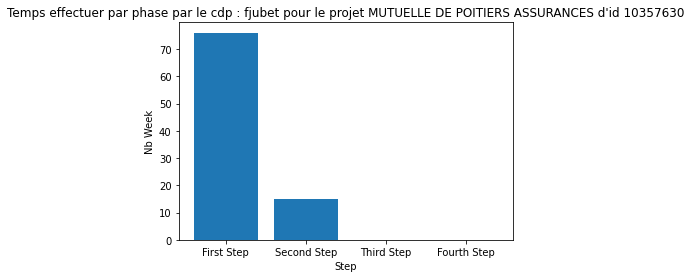

In [15]:
"""def convert_week_in_month(dico_date_in_week):
    for key, value in dico_date_in_week.items():
        if key == "Total week":
            
    pass"""

def create_dataviz_every_cdp_in_function_Oneproject_and_time(dico_date_in_week,name_cdp, name_project, idProject):
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        if search['IdProject'] == idProject:
            xl = list(search[name_cdp].keys())[:len(list_step_to_do)-1]
            yl = list(search[name_cdp].values())[:len(list_step_to_do)-1]
            break
    print(xl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    plt.bar(xl,yl)
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par le cdp : {name_cdp} pour le projet {name_project} d'id {idProject}")
create_dataviz_every_cdp_in_function_Oneproject_and_time(dict_all_cdp_time_do,'fjubet','MUTUELLE DE POITIERS ASSURANCES', 10357630)


def check_cdp_out_of_limit_date(list_delay):
    pass

def dataviz_to_check_cdp_out_bounds():
    pass

['1\n0\n3\n5\n6\n6\n5\n9', '1\n0\n3\n5\n6\n6\n6\n4', '1\n0\n3\n5\n7\n6\n0\n6', '1\n0\n3\n5\n7\n6\n1\n2', '1\n0\n3\n5\n7\n6\n3\n0', '1\n0\n3\n6\n0\n3\n1\n1', '1\n0\n3\n6\n0\n3\n1\n6', '1\n0\n3\n6\n3\n2\n7\n9', '1\n0\n3\n6\n3\n9\n8\n7', '1\n0\n3\n6\n3\n9\n9\n2', '1\n0\n3\n8\n0\n5\n0\n2', '1\n0\n3\n8\n0\n5\n0\n7', '1\n0\n3\n8\n4\n8\n2\n1', '1\n0\n3\n8\n5\n8\n7\n7', '1\n0\n3\n9\n0\n7\n9\n8', '1\n0\n3\n9\n3\n7\n6\n7', '1\n0\n3\n9\n3\n7\n7\n2', '1\n0\n3\n9\n5\n1\n0\n9', '1\n0\n4\n1\n2\n8\n7\n1', '1\n0\n4\n1\n4\n9\n7\n6', '1\n0\n4\n1\n5\n2\n0\n0', '1\n0\n4\n1\n8\n6\n0\n2', '1\n0\n4\n1\n8\n6\n0\n4', '1\n0\n4\n2\n1\n8\n6\n9', '1\n0\n4\n2\n3\n6\n7\n3', '1\n0\n4\n2\n3\n6\n8\n1', '1\n0\n4\n2\n3\n8\n2\n0', '1\n0\n4\n2\n3\n8\n2\n5', '1\n0\n4\n5\n7\n8\n0\n0', '1\n0\n9\n4\n1\n5\n1\n6', '1\n0\n9\n4\n1\n5\n5\n3', '1\n0\n9\n4\n1\n5\n9\n6', '1\n0\n9\n4\n1\n6\n1\n4', '1\n0\n9\n4\n1\n6\n3\n0', '1\n0\n9\n4\n1\n6\n4\n4', '1\n0\n9\n4\n1\n6\n5\n0', '1\n0\n9\n4\n1\n6\n5\n6', '1\n0\n9\n4\n1\n6\n7\n2', '1\n0\n9\n4

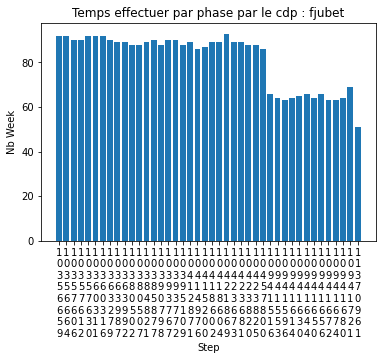

In [16]:
def create_dataviz_in_function_project_and_total_time_of_cdp(dico_date_in_week,name_cdp):
    list_step_to_do = []
    xl , yl = [], []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        xl.append('\n'.join([i for i in str(search['IdProject'])]))
        #print(xl)
        yl.append(search[name_cdp]['Total week'])
        
    print(xl)
    print(yl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    plt.bar(xl,yl)
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par le cdp : {name_cdp}")
create_dataviz_in_function_project_and_total_time_of_cdp(dict_all_cdp_time_do,'fjubet')


In [17]:
def calculate_week_average_every_cdp(dico_date_in_week,name_cdp):
    moy, somme = 0, 0
    list_time_to_do = dico_date_in_week[name_cdp]
    if(type(list_time_to_do[-1]) != int):
        for search in list_time_to_do:
            somme = somme + search[name_cdp]['Total week']
        moy = int(int(somme) / int(len(list_time_to_do)))
        dico_date_in_week[name_cdp].append(moy)
        return moy
    else:
        return list_time_to_do[-1]
for key, value in dict_all_cdp_time_do.items():
    calculate_week_average_every_cdp(dict_all_cdp_time_do,key)
print(dict_all_cdp_time_do)

{'akhalil': [{'akhalil': {'First Step': 26, 'Second Step': 2, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 28}, 'Project': 'GROUPE SPGT', 'IdProject': 11666008}, {'akhalil': {'First Step': 7, 'Second Step': 0, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 7}, 'Project': 'COOPERL ARC ATLANTIQUE', 'IdProject': 12229137}, {'akhalil': {'First Step': 6, 'Second Step': 0, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 6}, 'Project': 'COOPERL ARC ATLANTIQUE', 'IdProject': 12282420}, 13], 'mvallebella': [{'mvallebella': {'First Step': 0, 'Second Step': 52, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 52}, 'Project': 'SNR', 'IdProject': 11303737}, {'mvallebella': {'First Step': 0, 'Second Step': 51, 'Third Step': 0, 'Fourth Step': 0, 'Total week': 51}, 'Project': 'SNR', 'IdProject': 11316658}, 51], 'hbonhomme': [{'hbonhomme': {'First Step': 14, 'Second Step': 28, 'Third Step': 0, 'Fourth Step': 1, 'Total week': 43}, 'Project': 'VEOLIA ENVIRONNEMENT', 'IdProject': 11381569}, {'hbonh

[13, 51, 18, 20, 14, 34, 68, 44, 17, 3, 32, 25, 35, 84, 12, 17, 81, 48, 29, 28, 35, 52, 53, 20, 10, 2, 5, 27, 19, 23, 32, 8, 10, 10, 4, 55, 35, 7, 15, 60, 42, 7, 11]


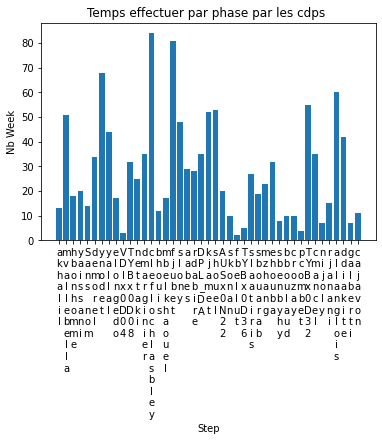

In [20]:

def dataviz(dico_date_in_week,list_cdp):
    list_step_to_do = []
    xl = []
    yl = []
    for cdp in list_cdp:
        s = '\n'.join([i for i in cdp])
        xl.append(s)
    for key, value in dico_date_in_week.items():
        yl.append(value[-1])
    print(yl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    plt.bar(xl,yl)
    plt.xlabel("Step")
    plt.ylabel("Nb Week")
    plt.title(f"Temps effectuer par phase par les cdps ")
dataviz(dict_all_cdp_time_do,list_cdp_without_duplication)



In [ ]:
s={'a':(2,6),"b":(4,7),"c":(3,9)}
print(s['a'][0])
l = s.values()
print(list(l)[:len(l)-1][0])
print(dict((i,j[0]) for i,j in s.items()))

In [ ]:
a = ["tr",3]
a

In [ ]:
# Dataviz
import numpy as np
import pandas as pd
res = np.where(pd.isnull(data_to_treat))


In [ ]:
s = datetime.datetime(2021,4,3)
print(s.day)
print(datetime.datetime.now().year)

In [ ]:
l = data_to_treat["Cdp"]
l = list(set(l))
print(l)
len(l)

In [ ]:
import numpy as np    
nat = np.datetime64(2021,4,3)

def nat_check(nat):
    return nat == np.datetime64('NaT')    

nat_check(nat)

In [ ]:
nat_as_integer = np.datetime64('NAT').view('i8')
def isnat(your_datetime):
    dtype_string = str(your_datetime.dtype)
    if 'datetime64' in dtype_string or 'timedelta64' in dtype_string:
        return your_datetime.view('i8') == nat_as_integer
    return False  # it can't be a NaT if it's not a dateime

isnat(np.datetime64(datetime.datetime(2021,4,3)))

In [ ]:
import datetime


In [ ]:
!%hist

In [ ]:
!%history

In [ ]:
%history